# Датасет №1 "Mushroom Classification"

### Описание датасета

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из "Полевого справочника по грибам Северной Америки" Общества Одюбона (1981). Каждый вид идентифицирован как определенно съедобный, определенно ядовитый или неизвестно съедобный и не рекомендуемый. Последний класс был объединен с ядовитым. В справочнике четко сказано, что не существует простого правила для определения съедобности гриба; нет такого правила, как "три листочка, пусть будет" для ядовитых дуба и плюща.

---

* **classes: edible=e, poisonous=p** — целевая переменная

---

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


### Импорт модулей

In [2]:
# импорт стандартных модулей 

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [3]:
# иморт модулей sklearn'а

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Загрузка датасета и подготовка данных

Файл я брала с выгруженного на свой гитхаб репозитория

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/almondloverr/ml_exam/main/datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
print("В датасете", df.shape[0], "точек данных и", df.shape[1], "параметров")

В датасете 8124 точек данных и 23 параметров


In [6]:
df.info() # все параметры датасета — категориальные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.columns # class — наша целевая переменная

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
# наш гри либо edible (e) — съедобный, либо poisonous (p) — ядовитый 
df['class'].unique() 

array(['p', 'e'], dtype=object)

In [9]:
df.isnull().sum() # смотрим количество пустых значений в датасете (отустутстуют)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.describe(include=object).T # описательная статистика по всем параметрам (тип — объект)

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### Выводим текстовые атрибуты и их уникальные значения для дальнейшего анализа


Чтобы посмотреть количество атрибутов каждого признака и решить, каким образом лучше заменить категориальные значения на числовые, выводим уникальные точки данных для каждого параметра. 

По-хорошему, целевую переменную класс лучшем всего заменить через map функцию: 
```
df['class'] = df['class'].map({'e': 0, 'p': 1})
```

Параметры, у которых 2-3 уникальных значения можно заменить через дамми-переменные: 


```
df_параметр = pd.get_dummies(df['параметр']).rename(columns={'знач1': 'параметр_знач1', 'знач2': 'параметр_знач2'})
df = df.join(df_параметр).drop('параметр', axis=1)
```
Остальное удобнее всего заменить через LabelEncoder



In [11]:
for column in df.select_dtypes(include='object').columns.tolist():
  print(f'{column}\n{df[column].value_counts()}\n')

class
e    4208
p    3916
Name: class, dtype: int64

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

stalk-root
b 

Признак veil-type уберем, так как там всего одно значение и оно никак не повлияет на дальнейшую задачу регрессии / классификации 

In [12]:
df = df.drop('veil-type', axis=1)

### Замена категориальных параметров на числовые 

Для замены категориальных признаков на числовые используем LabelEncoder (для удобства)

In [13]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### Визуализация данных

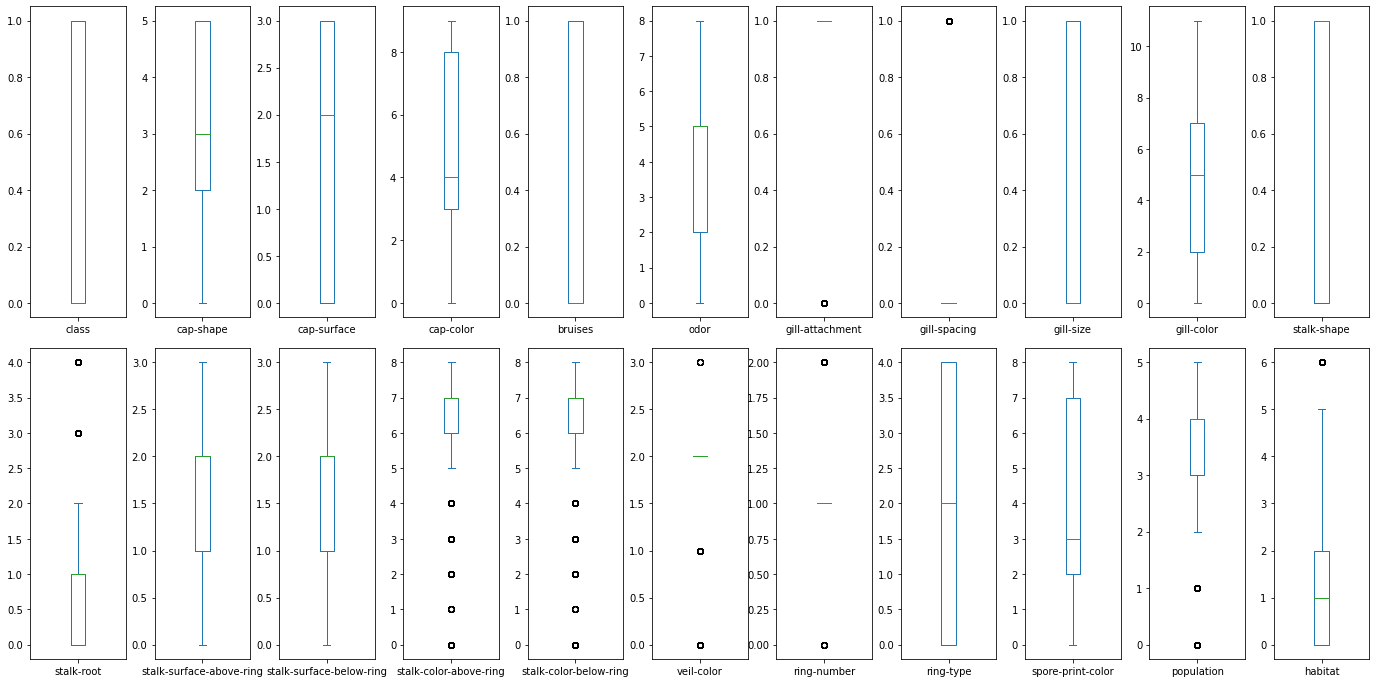

In [14]:
fig, ax = plt.subplots(2, df.shape[1]//2, figsize=(24,12))
df.plot(kind='box', subplots=True, ax=ax)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

### Выделяем целевую переменную и остальные признаки

In [15]:
y = df['class']
x = df.drop(['class'], axis=1)

### Разделяем выбору в соотношении 80/20 процентов, `shuffle=False` для исключения перемешивания данных

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [17]:
print(f'Количество точек исходных данных: {y.shape[0]}')
print(f'Количество точек тренировочных данных: {y_train.shape[0]}')
print(f'Количество точек тестовых данных: {y_test.shape[0]}')

Количество точек исходных данных: 8124
Количество точек тренировочных данных: 6499
Количество точек тестовых данных: 1625


### Нормализуем наши данные 

Я использую для этого МинМаксСкалер, можно еще использовать СтандартСкалер

In [18]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

Смотрим, как коррелируют наши параметры между собой по пРиКоЛу

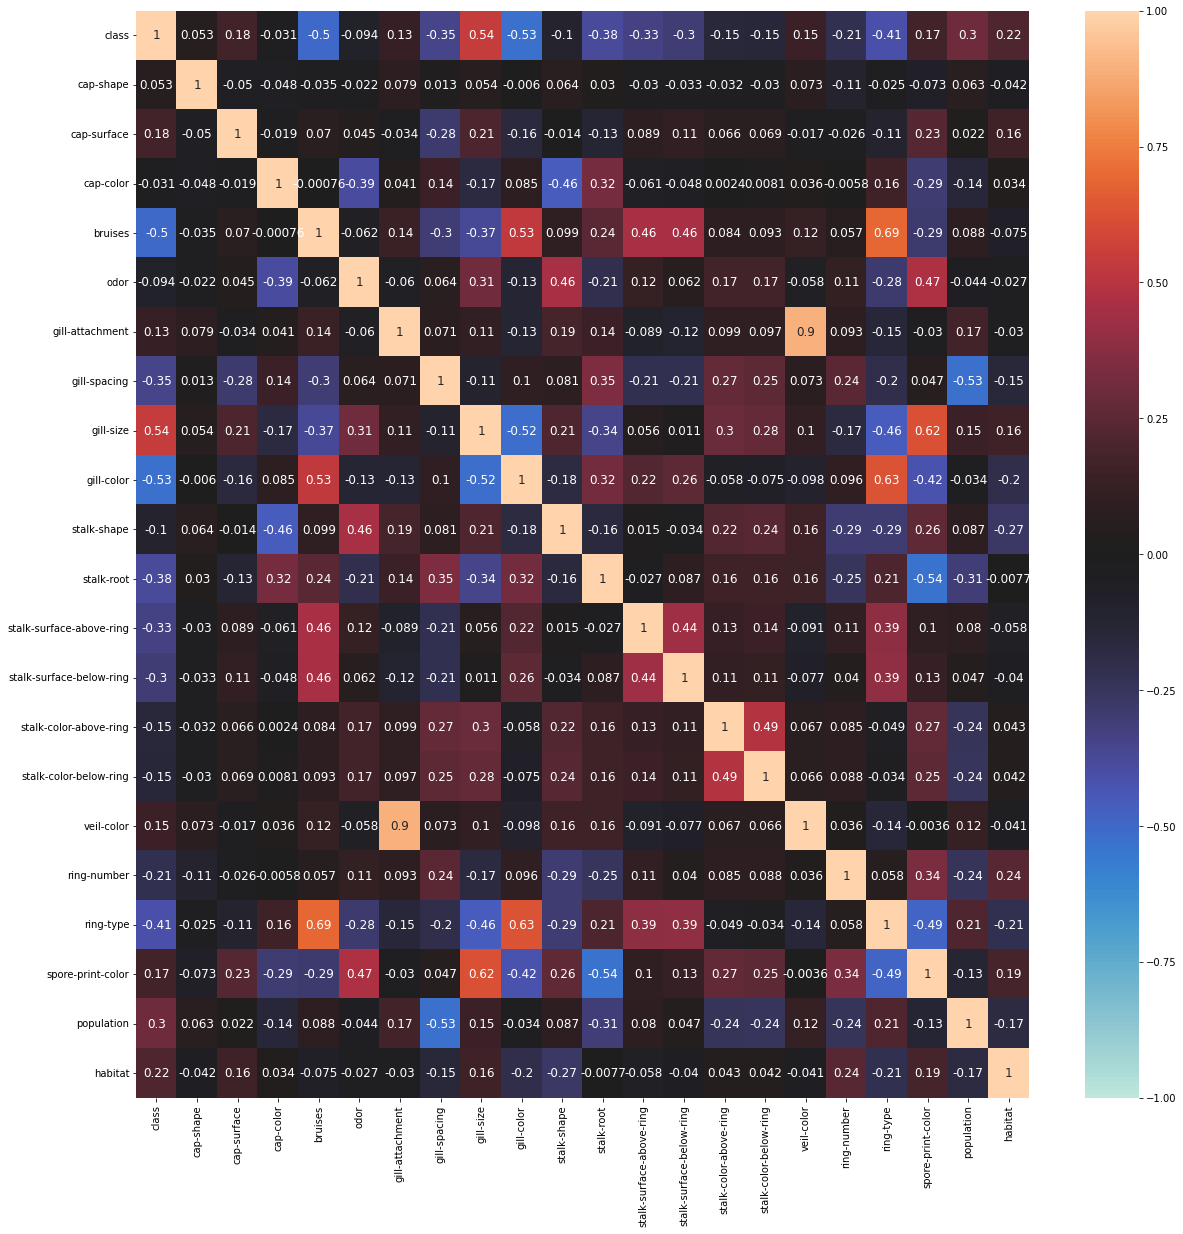

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 12}, vmin=-1, vmax=1, center=0)

### Задача классификации

Так как этих методов дохуя, сделаем классификацию с использованием основных пяти: 
- логистическая регрессия 
- метод опорных векторов (линейное ядрос)
- метод опорных векторов (гауссовое ядро)
- метод k ближайших соседей 
- метод деревая решений 

#### Логистическая регрессия

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
cls = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train, y_train)
y_pred_cls = cls.predict(x_test)

matrix_cls = metrics.confusion_matrix(y_test, y_pred_cls)
print(matrix_cls)

[[  46  461]
 [  43 1075]]


In [22]:
print(f'Метрика достоверности (logistic): {metrics.accuracy_score(y_test, y_pred_cls)}')
print(f'Метрика точности (logistic): {metrics.precision_score(y_test, y_pred_cls)}')
print(f'Метрика полноты (logistic): {metrics.recall_score(y_test, y_pred_cls)}')

Метрика достоверности (logistic): 0.6898461538461539
Метрика точности (logistic): 0.6998697916666666
Метрика полноты (logistic): 0.9615384615384616


#### Метод опорных векторов с линейным ядром 

In [23]:
from sklearn import svm

In [24]:
svc = svm.SVC(kernel='linear', probability=True).fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
print(matrix_svc)

[[ 118  389]
 [  43 1075]]


In [25]:
print(f'Метрика достоверности (svc linear): {metrics.accuracy_score(y_test, y_pred_svc)}')
print(f'Метрика точности (svc linear): {metrics.precision_score(y_test, y_pred_svc)}')
print(f'Метрика полноты (svc linear): {metrics.recall_score(y_test, y_pred_svc)}')

Метрика достоверности (svc linear): 0.7341538461538462
Метрика точности (svc linear): 0.7342896174863388
Метрика полноты (svc linear): 0.9615384615384616


#### Метод опорных векторов с гауссовым ядром 

In [26]:
svc_g = svm.SVC(kernel='rbf', probability=True).fit(x_train, y_train)
y_pred_svc_g = svc_g.predict(x_test)

matrix_svc_g = metrics.confusion_matrix(y_test, y_pred_svc_g)
print(matrix_svc_g)

[[ 468   39]
 [  28 1090]]


In [27]:
print(f'Метрика достоверности (svc rbf): {metrics.accuracy_score(y_test, y_pred_svc_g)}')
print(f'Метрика точности (svc rbf): {metrics.precision_score(y_test, y_pred_svc_g)}')
print(f'Метрика полноты (svc rbf): {metrics.recall_score(y_test, y_pred_svc_g)}')

Метрика достоверности (svc rbf): 0.9587692307692308
Метрика точности (svc rbf): 0.9654561558901683
Метрика полноты (svc rbf): 0.9749552772808586


#### Метод k ближайших соседей

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# количество соседей n_neighbors = 10 подбирала вручную, проверку делала на метрике точности
kn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
y_pred_kn = kn.predict(x_test)

matrix_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(matrix_kn)

[[ 452   55]
 [   8 1110]]


In [30]:
print(f'Метрика достоверности (KN): {metrics.accuracy_score(y_test, y_pred_kn)}')
print(f'Метрика точности (KN): {metrics.precision_score(y_test, y_pred_kn)}')
print(f'Метрика полноты (KN): {metrics.recall_score(y_test, y_pred_kn)}')

Метрика достоверности (KN): 0.9612307692307692
Метрика точности (KN): 0.9527896995708155
Метрика полноты (KN): 0.9928443649373881


### Метод дерева решений 

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print(matrix_dt)

[[ 451   56]
 [   8 1110]]


In [33]:
print(f'Метрика достоверности (dec tree): {metrics.accuracy_score(y_test, y_pred_dt)}') 
print(f'Метрика точности (dec tree): {metrics.precision_score(y_test, y_pred_dt)}')
print(f'Метрика полноты (dec tree): {metrics.recall_score(y_test, y_pred_dt)}')

Метрика достоверности (dec tree): 0.9606153846153846
Метрика точности (dec tree): 0.9519725557461407
Метрика полноты (dec tree): 0.9928443649373881


### Оценка эффективности обучения моделей (метрики)

In [34]:
clas = {'LogisticRegression': y_pred_cls, 'SVC linear': y_pred_svc, 
        'SVC rbf': y_pred_svc_g, 'KNeighbors': y_pred_kn, 'DecisionTree': y_pred_dt}

for n, y_pred in clas.items():
  print(f'Достоверность ({n}): {metrics.accuracy_score(y_test, y_pred)}')
  print(f'Точность ({n}): {metrics.precision_score(y_test, y_pred)}')
  print(f'Полнота ({n}): {metrics.recall_score(y_test, y_pred)}\n')

Достоверность (LogisticRegression): 0.6898461538461539
Точность (LogisticRegression): 0.6998697916666666
Полнота (LogisticRegression): 0.9615384615384616

Достоверность (SVC linear): 0.7341538461538462
Точность (SVC linear): 0.7342896174863388
Полнота (SVC linear): 0.9615384615384616

Достоверность (SVC rbf): 0.9587692307692308
Точность (SVC rbf): 0.9654561558901683
Полнота (SVC rbf): 0.9749552772808586

Достоверность (KNeighbors): 0.9612307692307692
Точность (KNeighbors): 0.9527896995708155
Полнота (KNeighbors): 0.9928443649373881

Достоверность (DecisionTree): 0.9606153846153846
Точность (DecisionTree): 0.9519725557461407
Полнота (DecisionTree): 0.9928443649373881



**На основе метрик мы видим, что наиболее применимой моделью в данном случае является метод дерева принятия решений, все метрики наиболее приближены к 1** 

### Выводы об обученности моделей 

Находим вероятность принадлежности классу с помощью метода `.predict_proba`:

In [35]:
y_pred_cls_proba = cls.predict_proba(x_test)
cls_probs = y_pred_cls_proba[:, 1]
cls_fpr, cls_tpr, cls_treshold = metrics.roc_curve(y_test, cls_probs)

In [36]:
y_pred_svc_proba = svc.predict_proba(x_test)
svc_probs = y_pred_svc_proba[:, 1]
svc_fpr, svc_tpr, svc_treshold = metrics.roc_curve(y_test, svc_probs)

In [37]:
y_pred_svc_g_proba = svc_g.predict_proba(x_test)
svc_g_probs = y_pred_svc_g_proba[:, 1]
svc_g_fpr, svc_g_tpr, svc_g_treshold = metrics.roc_curve(y_test, svc_g_probs)

In [38]:
y_pred_kn_proba = kn.predict_proba(x_test)
kn_probs = y_pred_kn_proba[:, 1]
kn_fpr, kn_tpr, kn_treshold = metrics.roc_curve(y_test, kn_probs)

In [39]:
y_pred_dt_proba = dt.predict_proba(x_test)
dt_probs = y_pred_dt_proba[:, 1]
dt_fpr, dt_tpr, dt_treshold = metrics.roc_curve(y_test, dt_probs)

#### Строим ROC-кривые для каждой модели
ROC-кривая описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

TPR, или чувствительность модели, является соотношением корректных классификаций положительного класса, разделённых на все положительные классы, доступные из набора данных.

FPR — доля ложноположительных примеров, false positives rate. Это соотношение между ложными срабатываниями (количество прогнозов, ошибочно отнесённых в положительные), и всеми доступными отрицательными классами.

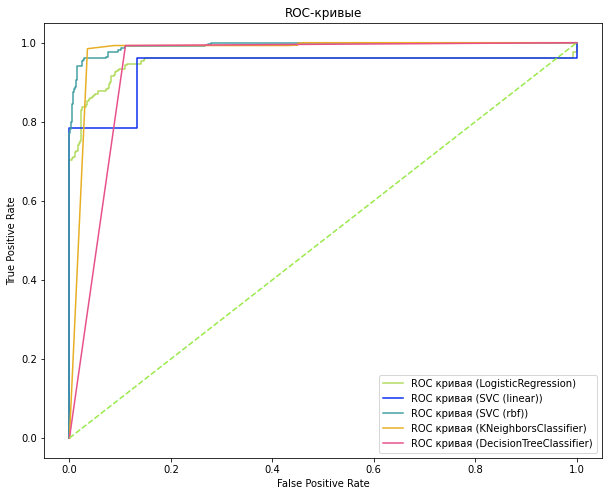

In [40]:
plt.figure(figsize=(10,8))

plt.plot(cls_fpr, cls_tpr, color=np.random.rand(3,),
         label='ROC кривая (LogisticRegression)')
plt.plot(svc_fpr, svc_tpr, color=np.random.rand(3,),
         label='ROC кривая (SVC (linear))')
plt.plot(svc_g_fpr, svc_g_tpr, color=np.random.rand(3,),
         label='ROC кривая (SVC (rbf))')
plt.plot(kn_fpr, kn_tpr, color=np.random.rand(3,),
         label='ROC кривая (KNeighborsClassifier)')
plt.plot(dt_fpr, dt_tpr, color=np.random.rand(3,),
         label='ROC кривая (DecisionTreeClassifier)')
plt.plot([0, 1], [0, 1], color=np.random.rand(3,), linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()
plt.show()

In [41]:
cls_roc_auc = metrics.auc(cls_fpr, cls_tpr)
svc_roc_auc = metrics.auc(svc_fpr, svc_tpr)
svc_g_roc_auc = metrics.auc(svc_g_fpr, svc_g_tpr)
kn_roc_auc = metrics.auc(kn_fpr, kn_tpr)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)

auc_df = pd.DataFrame({
    'Модель классификации': ['Логистическая регрессия', 'Опорные вектора (линейное ядро)', 
                          'Опорные вектора (гауссовое ядро)', 'k ближайших соседей', 'Дерево решений'],
    'AUC': [cls_roc_auc, svc_roc_auc, svc_g_roc_auc, kn_roc_auc, dt_roc_auc]})
auc_df.sort_values(by = 'AUC', ascending = False, inplace=True)
auc_df.set_index([pd.Index([1, 2, 3, 4, 5])], inplace=True)
auc_df

,Модель классификации,AUC
1,Опорные вектора (гауссовое ядро),0.993097
2,k ближайших соседей,0.978799
3,Логистическая регрессия,0.948827
4,Дерево решений,0.941195
5,Опорные вектора (линейное ядро),0.937905


### Вывод о недообученности/переобученности модели

In [42]:
acc_cls = metrics.accuracy_score(y_test, y_pred_cls)
acc_svc = metrics.accuracy_score(y_test, y_pred_svc)
acc_svc_g = metrics.accuracy_score(y_test, y_pred_svc_g)
acc_kn = metrics.accuracy_score(y_test, y_pred_kn)
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)

acc_train_cls = metrics.accuracy_score(y_train, cls.predict(x_train))
acc_train_svc = metrics.accuracy_score(y_train, svc.predict(x_train))
acc_train_svc_g = metrics.accuracy_score(y_train, svc_g.predict(x_train))
acc_train_kn = metrics.accuracy_score(y_train, kn.predict(x_train))
acc_train_dt = metrics.accuracy_score(y_train, dt.predict(x_train))

In [43]:
trained = pd.DataFrame(columns = ['test data', 'train data'])

logistic = [acc_cls, acc_train_cls]
svm = [acc_svc, acc_train_svc]
svm_g = [acc_svc, acc_train_svc]
kneighbors = [acc_kn, acc_train_kn]
dtree = [acc_dt, acc_train_dt]

trained.loc[0] = logistic
trained.loc[1] = svm
trained.loc[2] = svm_g
trained.loc[3] = kneighbors
trained.loc[4] = dtree

trained['result'] = trained.apply(lambda x: 'обучена адекватно' if (abs(x['test data'] - x['train data']) <= 0.015) else 
                                  ('недообучена' if (x['test data'] > x['train data']) else 'переобучена'), axis=1)
trained.set_axis(['LogisticRegression', 'SVC linear', 'SVC rbf', 'KNeighbors', 'DecisionTree'], axis='index', inplace=True)

trained

,test data,train data,result
LogisticRegression,0.689846,0.947992,переобучена
SVC linear,0.734154,0.963994,переобучена
SVC rbf,0.734154,0.963994,переобучена
KNeighbors,0.961231,0.999846,переобучена
DecisionTree,0.960615,1.000000,переобучена
